In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('../../preprocessed_data/전처리 완료/현대_지역별수출실적.csv')

In [4]:
df

,국가,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,기타,2025,46,0,0,0,0,0,0,0,0,0,0,0
1,동유럽,2023,2535,3074,2598,3904,3768,3637,3578,3368,2604,3321,3165,2721
2,동유럽,2024,2373,3515,3637,3826,2186,2648,2140,2585,4095,4044,3273,2953
3,동유럽,2025,3025,0,0,0,0,0,0,0,0,0,0,0
4,북미-멕시코,2023,8,82,57,45,69,31,202,216,75,130,200,112
5,북미-멕시코,2024,60,51,287,373,194,150,143,146,189,153,121,72
6,북미-멕시코,2025,29,0,0,0,0,0,0,0,0,0,0,0
7,북미-미국,2023,33157,44040,44161,43894,51132,47682,46768,46840,49241,57589,58435,58183
8,북미-미국,2024,55421,43704,57669,63939,62068,55809,44859,52389,45941,52255,45782,57802
9,북미-미국,2025,41454,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.loc[df['국가']=='아시아-기타','국가'] = '아시아'

In [6]:
df

,국가,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,기타,2025,46,0,0,0,0,0,0,0,0,0,0,0
1,동유럽,2023,2535,3074,2598,3904,3768,3637,3578,3368,2604,3321,3165,2721
2,동유럽,2024,2373,3515,3637,3826,2186,2648,2140,2585,4095,4044,3273,2953
3,동유럽,2025,3025,0,0,0,0,0,0,0,0,0,0,0
4,북미-멕시코,2023,8,82,57,45,69,31,202,216,75,130,200,112
5,북미-멕시코,2024,60,51,287,373,194,150,143,146,189,153,121,72
6,북미-멕시코,2025,29,0,0,0,0,0,0,0,0,0,0,0
7,북미-미국,2023,33157,44040,44161,43894,51132,47682,46768,46840,49241,57589,58435,58183
8,북미-미국,2024,55421,43704,57669,63939,62068,55809,44859,52389,45941,52255,45782,57802
9,북미-미국,2025,41454,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df2=pd.read_csv('../현대_21_22_지역별_전처리.csv')

In [13]:
df_all=pd.concat([df,df2],ignore_index=True)

In [15]:
df_all[df_all['국가']=='아시아']

,국가,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
16,아시아,2023,11288,7295,8997,10570,10678,10496,10563,9940,4984,10793,7556,7712
17,아시아,2024,6891,6057,7161,8351,7760,9011,7822,8918,10004,7142,6838,7324
18,아시아,2025,6294,0,0,0,0,0,0,0,0,0,0,0
35,아시아,2021,7565,8895,9135,6783,7057,7235,9905,7238,8199,8713,6916,6934
36,아시아,2022,7921,8101,7615,10906,9953,8908,7855,7611,7533,8788,9401,6811


In [16]:
df_all.dtypes

국가     object
연도      int64
1월      int64
2월      int64
3월      int64
4월      int64
5월      int64
6월      int64
7월      int64
8월      int64
9월      int64
10월     int64
11월     int64
12월     int64
dtype: object

In [17]:
df_melted = pd.melt(
    df_all,
    id_vars=["국가", "연도"],
    value_vars=[f"{m}월" for m in range(1, 13)],
    var_name="월",
    value_name="수출실적"
)

In [18]:
df_melted

,국가,연도,월,수출실적
0,기타,2025,1월,46
1,동유럽,2023,1월,2535
2,동유럽,2024,1월,2373
3,동유럽,2025,1월,3025
4,북미-멕시코,2023,1월,8
...,...,...,...,...
487,아시아,2022,12월,6811
488,중남미,2021,12월,4385
489,중남미,2022,12월,5012
490,중동·아프리카,2021,12월,15084


In [19]:
# '월' 컬럼을 숫자로 변환하고 날짜 컬럼 생성
df_melted["월"] = df_melted["월"].str.replace("월", "").astype(int)
df_melted["날짜"] = pd.to_datetime(df_melted["연도"].astype(str) + "-" + df_melted["월"].astype(str).str.zfill(2) + "-01")


In [20]:
df_melted

,국가,연도,월,수출실적,날짜
0,기타,2025,1,46,2025-01-01
1,동유럽,2023,1,2535,2023-01-01
2,동유럽,2024,1,2373,2024-01-01
3,동유럽,2025,1,3025,2025-01-01
4,북미-멕시코,2023,1,8,2023-01-01
...,...,...,...,...,...
487,아시아,2022,12,6811,2022-12-01
488,중남미,2021,12,4385,2021-12-01
489,중남미,2022,12,5012,2022-12-01
490,중동·아프리카,2021,12,15084,2021-12-01


In [21]:
# Prophet 입력 형식 컬럼명으로 변경
df_melted.rename(columns={"날짜": "ds", "수출실적": "y"}, inplace=True)

In [23]:
df_melted = df_melted[df_melted["ds"] < pd.to_datetime("2025-02-01")]

In [56]:
df_melted[df_melted['국가']=='아시아']

,국가,연도,월,y,ds
35,아시아,2021,1,7565,2021-01-01
76,아시아,2021,2,8895,2021-02-01
117,아시아,2021,3,9135,2021-03-01
158,아시아,2021,4,6783,2021-04-01
199,아시아,2021,5,7057,2021-05-01
240,아시아,2021,6,7235,2021-06-01
281,아시아,2021,7,9905,2021-07-01
322,아시아,2021,8,7238,2021-08-01
363,아시아,2021,9,8199,2021-09-01
404,아시아,2021,10,8713,2021-10-01


In [24]:
df_melted['ds'].unique()

<DatetimeArray>
['2025-01-01 00:00:00', '2023-01-01 00:00:00', '2024-01-01 00:00:00',
 '2021-01-01 00:00:00', '2022-01-01 00:00:00', '2023-02-01 00:00:00',
 '2024-02-01 00:00:00', '2021-02-01 00:00:00', '2022-02-01 00:00:00',
 '2023-03-01 00:00:00', '2024-03-01 00:00:00', '2021-03-01 00:00:00',
 '2022-03-01 00:00:00', '2023-04-01 00:00:00', '2024-04-01 00:00:00',
 '2021-04-01 00:00:00', '2022-04-01 00:00:00', '2023-05-01 00:00:00',
 '2024-05-01 00:00:00', '2021-05-01 00:00:00', '2022-05-01 00:00:00',
 '2023-06-01 00:00:00', '2024-06-01 00:00:00', '2021-06-01 00:00:00',
 '2022-06-01 00:00:00', '2023-07-01 00:00:00', '2024-07-01 00:00:00',
 '2021-07-01 00:00:00', '2022-07-01 00:00:00', '2023-08-01 00:00:00',
 '2024-08-01 00:00:00', '2021-08-01 00:00:00', '2022-08-01 00:00:00',
 '2023-09-01 00:00:00', '2024-09-01 00:00:00', '2021-09-01 00:00:00',
 '2022-09-01 00:00:00', '2023-10-01 00:00:00', '2024-10-01 00:00:00',
 '2021-10-01 00:00:00', '2022-10-01 00:00:00', '2023-11-01 00:00:00',
 '20

In [27]:
df_melted.to_csv('현대_지역별수출실적_melt.csv', index=False)

In [ ]:
df=pd.read_csv('현대_지역별수출실적_melt.csv')

In [29]:
df['국가'].unique()

array(['기타', '동유럽', '북미-멕시코', '북미-미국', '북미-캐나다', '서유럽', '아시아', '중남미',
       '중동·아프리카'], dtype=object)

In [30]:
df

,국가,연도,월,y,ds
0,기타,2025,1,46,2025-01-01
1,동유럽,2023,1,2535,2023-01-01
2,동유럽,2024,1,2373,2024-01-01
3,동유럽,2025,1,3025,2025-01-01
4,북미-멕시코,2023,1,8,2023-01-01
...,...,...,...,...,...
388,아시아,2022,12,6811,2022-12-01
389,중남미,2021,12,4385,2021-12-01
390,중남미,2022,12,5012,2022-12-01
391,중동·아프리카,2021,12,15084,2021-12-01


In [31]:
df = df.sort_values(by="ds").reset_index(drop=True)

In [43]:
df_melted.reset_index(drop=True)

,국가,연도,월,y,ds
0,기타,2025,1,46,2025-01-01
1,동유럽,2023,1,2535,2023-01-01
2,동유럽,2024,1,2373,2024-01-01
3,동유럽,2025,1,3025,2025-01-01
4,북미-멕시코,2023,1,8,2023-01-01
...,...,...,...,...,...
388,아시아,2022,12,6811,2022-12-01
389,중남미,2021,12,4385,2021-12-01
390,중남미,2022,12,5012,2022-12-01
391,중동·아프리카,2021,12,15084,2021-12-01


In [44]:
df_melted

,국가,연도,월,y,ds
0,기타,2025,1,46,2025-01-01
1,동유럽,2023,1,2535,2023-01-01
2,동유럽,2024,1,2373,2024-01-01
3,동유럽,2025,1,3025,2025-01-01
4,북미-멕시코,2023,1,8,2023-01-01
...,...,...,...,...,...
487,아시아,2022,12,6811,2022-12-01
488,중남미,2021,12,4385,2021-12-01
489,중남미,2022,12,5012,2022-12-01
490,중동·아프리카,2021,12,15084,2021-12-01


In [51]:
df_melted = df_melted.sort_values(by='ds')

In [52]:
df_melted["국가"].unique()

array(['북미-캐나다', '중동·아프리카', '중남미', '아시아', '서유럽', '북미-미국', '북미-멕시코', '동유럽',
       '기타'], dtype=object)

11:23:06 - cmdstanpy - INFO - Chain [1] start processing


11:23:06 - cmdstanpy - INFO - Chain [1] done processing


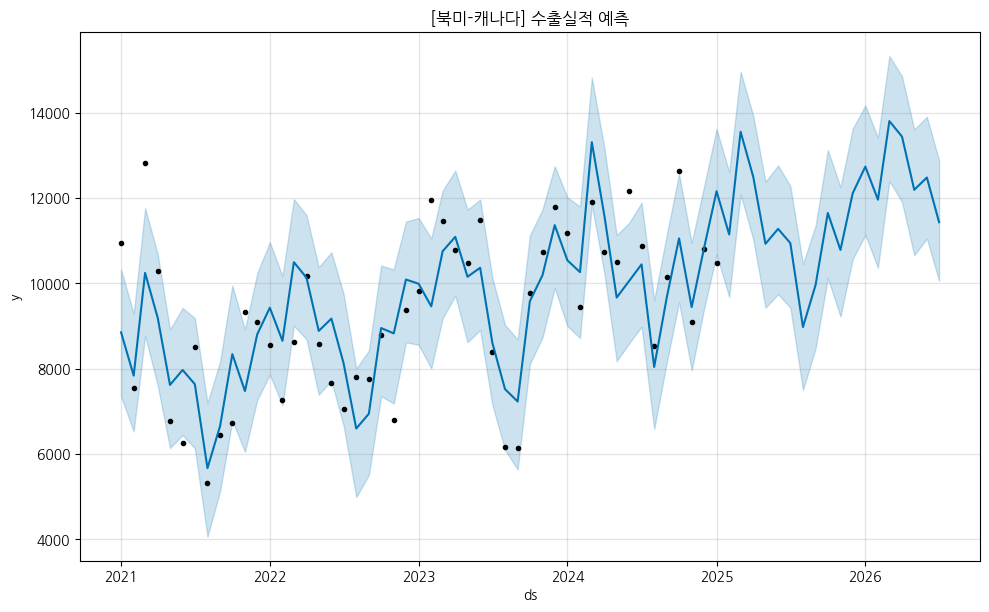

11:23:07 - cmdstanpy - INFO - Chain [1] start processing
11:23:07 - cmdstanpy - INFO - Chain [1] done processing


[완료] 북미-캐나다 - 그래프 및 모델 저장


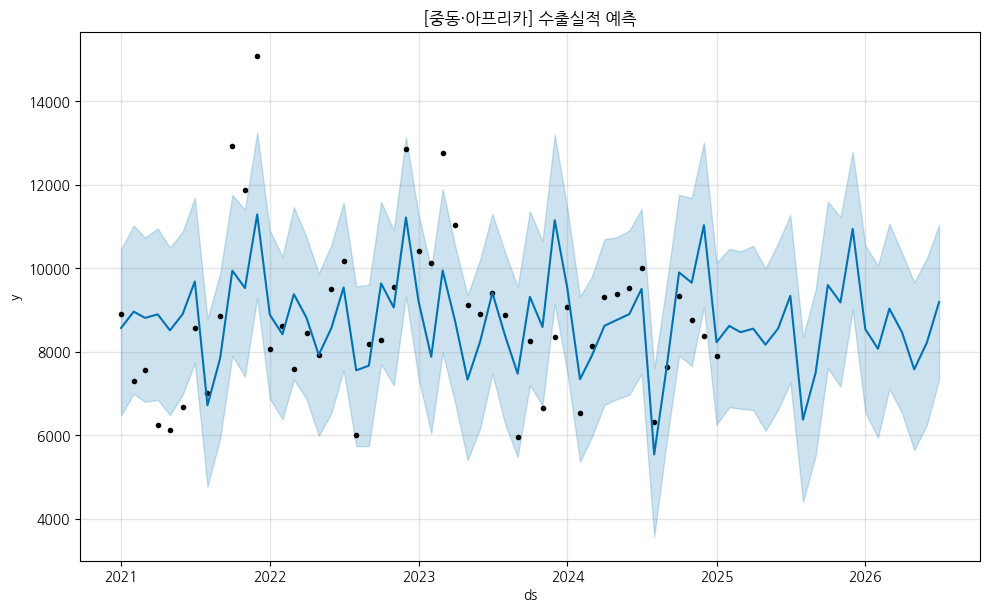

11:23:07 - cmdstanpy - INFO - Chain [1] start processing
11:23:07 - cmdstanpy - INFO - Chain [1] done processing


[완료] 중동·아프리카 - 그래프 및 모델 저장


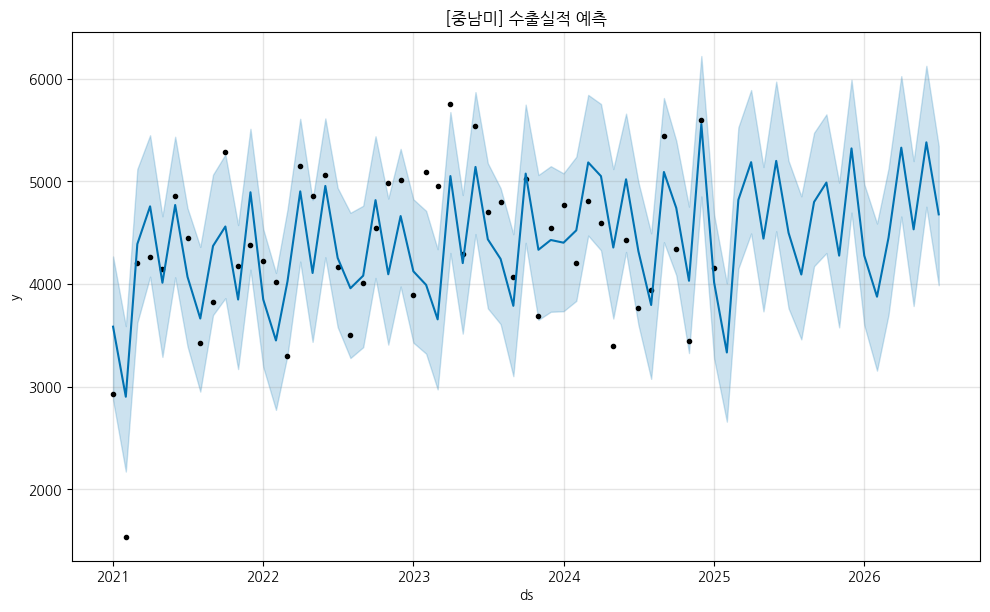

11:23:07 - cmdstanpy - INFO - Chain [1] start processing
11:23:07 - cmdstanpy - INFO - Chain [1] done processing


[완료] 중남미 - 그래프 및 모델 저장


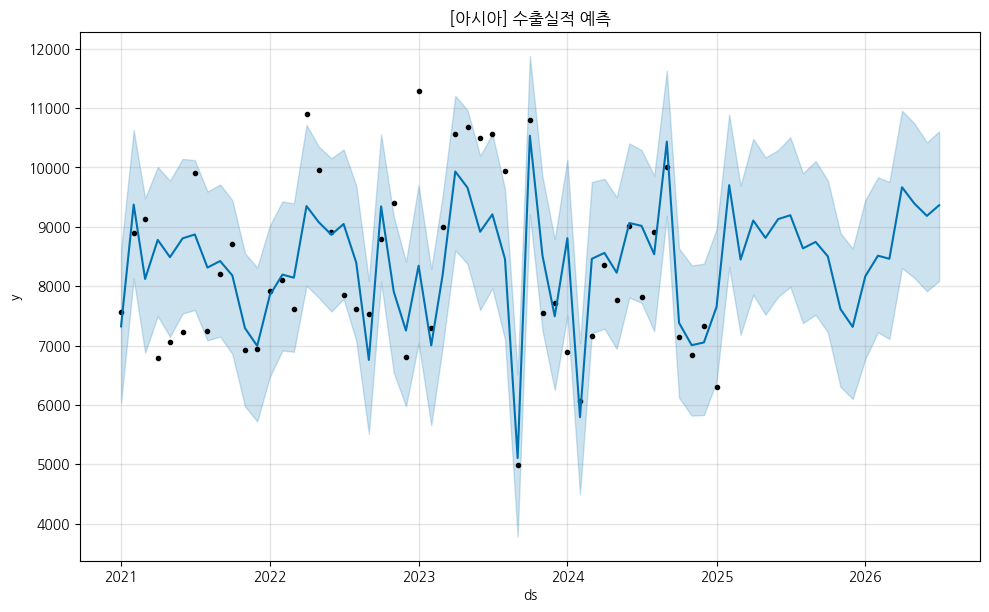

11:23:07 - cmdstanpy - INFO - Chain [1] start processing
11:23:08 - cmdstanpy - INFO - Chain [1] done processing


[완료] 아시아 - 그래프 및 모델 저장


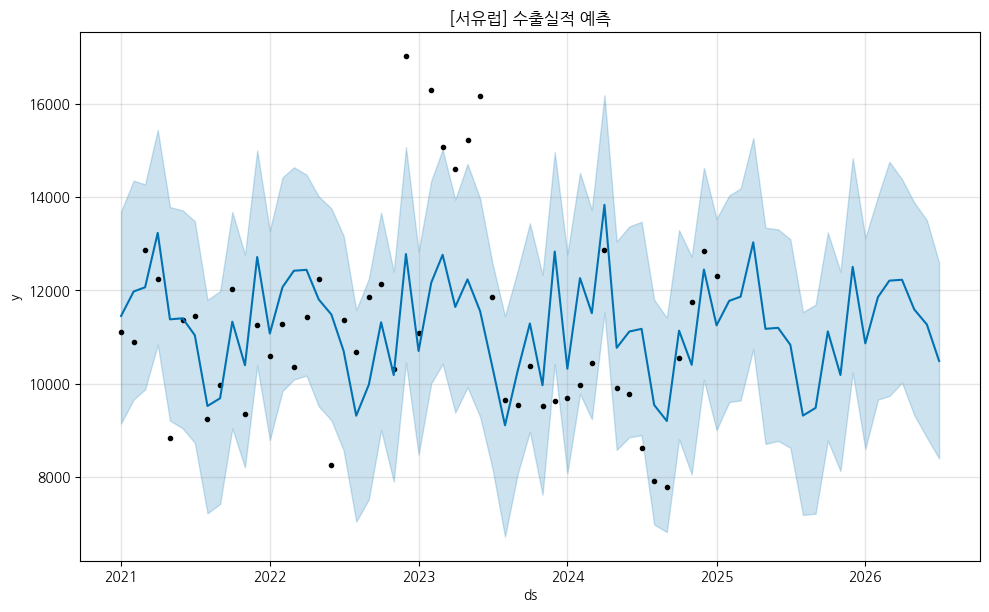

11:23:08 - cmdstanpy - INFO - Chain [1] start processing
11:23:08 - cmdstanpy - INFO - Chain [1] done processing


[완료] 서유럽 - 그래프 및 모델 저장


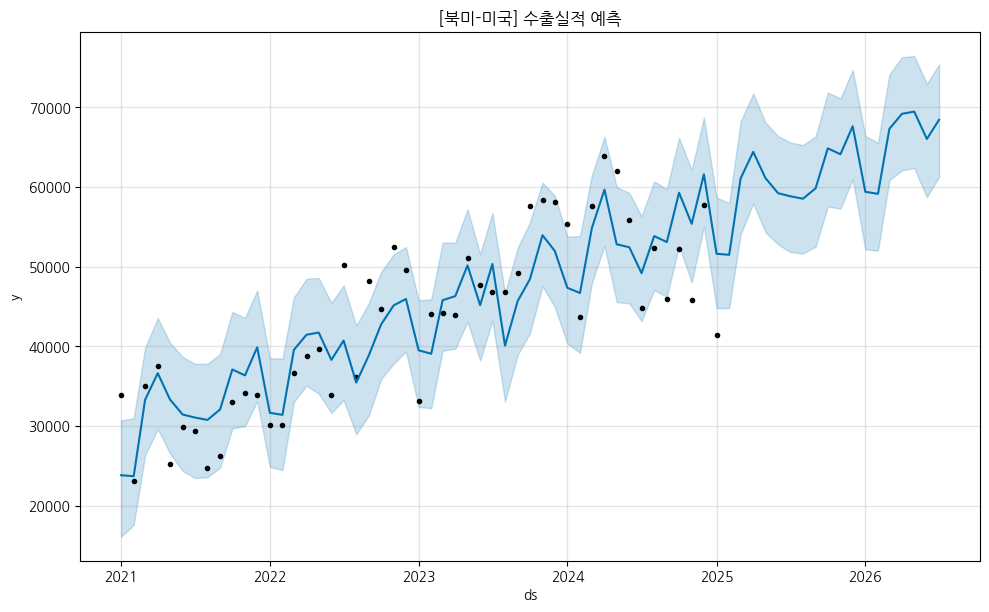

11:23:08 - cmdstanpy - INFO - Chain [1] start processing
11:23:08 - cmdstanpy - INFO - Chain [1] done processing


[완료] 북미-미국 - 그래프 및 모델 저장


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/plot.py:94: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout()
/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_8082/930057006.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.savefig(f"prophet_forecasts/hyundai_{country}_forecast.png")
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


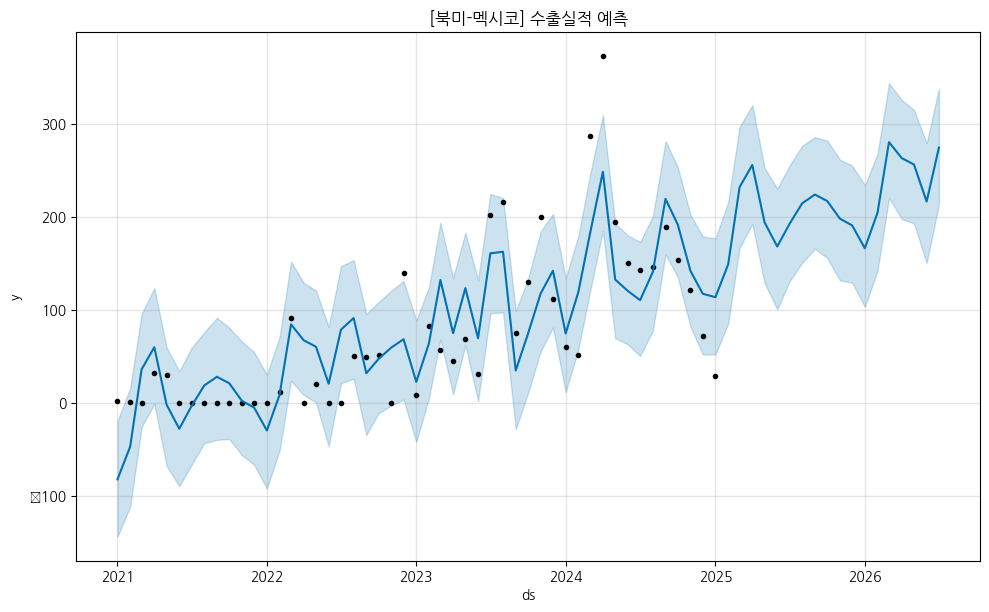

11:23:08 - cmdstanpy - INFO - Chain [1] start processing
11:23:08 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/plot.py:94: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout()


[완료] 북미-멕시코 - 그래프 및 모델 저장


/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_8082/930057006.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.savefig(f"prophet_forecasts/hyundai_{country}_forecast.png")
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


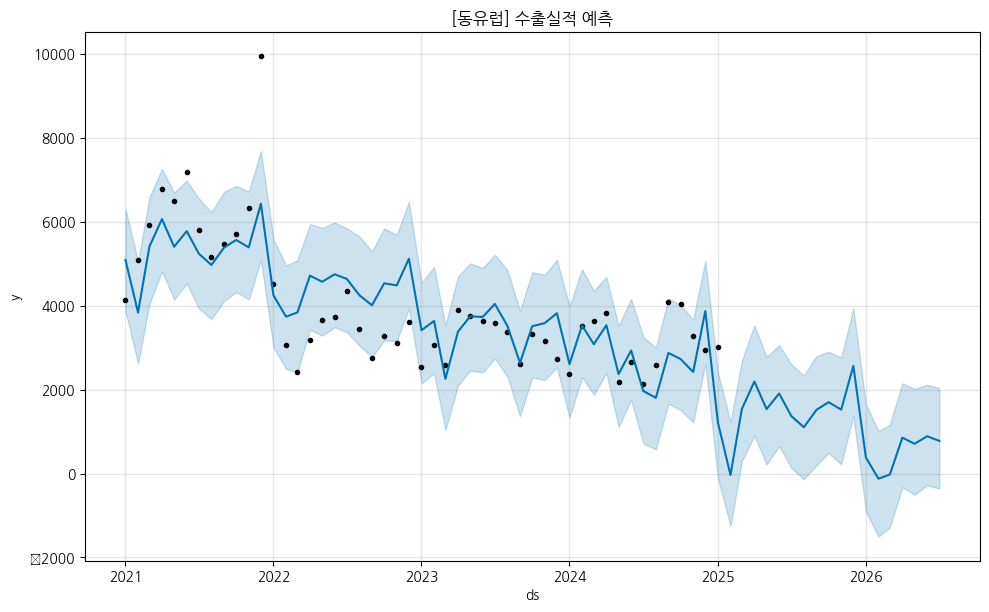

[완료] 동유럽 - 그래프 및 모델 저장
⛔ 기타: 유효한 수출 데이터가 1건뿐이므로 예측 생략


In [ ]:
import os
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import pickle

# 그래프 및 모델 저장 디렉토리 설정
os.makedirs("prophet_forecasts", exist_ok=True)
os.makedirs("prophet_models", exist_ok=True)

# 국가명 리스트 추출
countries = df_melted["국가"].unique()

# 국가별로 Prophet 모델 적용
for country in countries:
    df_country = df_melted[df_melted["국가"] == country][["ds", "y"]].copy()

    # ✅ 유효한 y값이 2개 이상일 때만 진행
    if df_country['y'].notnull().sum() < 2:
        print(f"⛔ {country}: 유효한 수출 데이터가 1건뿐이므로 예측 생략")
        continue

    # Prophet 모델 생성 및 학습
    model = Prophet(daily_seasonality=False, weekly_seasonality=False)
    model.fit(df_country)

    # 향후 18개월 예측
    future = model.make_future_dataframe(periods=18, freq="MS")
    forecast = model.predict(future)

    # 📈 예측 그래프 저장
    fig = model.plot(forecast)
    plt.title(f"[{country}] 수출실적 예측")
    plt.savefig(f"prophet_forecasts/hyundai_{country}_forecast.png")
    plt.show()
    plt.close(fig)  # 메모리 누수 방지

    # 💾 모델 저장 (Pickle 형식)
    with open(f"prophet_models/hyundai_{country}_model.pkl", "wb") as f:
        pickle.dump(model, f)

    print(f"[완료] {country} - 그래프 및 모델 저장")


In [54]:
last_date = df_country['ds'].max()
future_forecast = forecast[forecast['ds'] > last_date]

future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
49,2025-02-01,-33.975674,-1250.529247,1221.735644
50,2025-03-01,1538.211633,291.829319,2687.019356
51,2025-04-01,2193.921511,906.459370,3533.139347
52,2025-05-01,1536.103132,213.086819,2778.455480
53,2025-06-01,1908.520603,653.791310,3061.368989
54,2025-07-01,1372.024141,136.735898,2607.549004
55,2025-08-01,1103.471301,-134.084178,2340.001783
56,2025-09-01,1518.315910,193.874092,2797.123407
57,2025-10-01,1702.197212,493.238787,2903.026056
58,2025-11-01,1524.761078,220.203058,2766.406193


In [60]:
import os
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import pickle

# 저장 디렉토리
os.makedirs("prophet_forecasts", exist_ok=True)
os.makedirs("prophet_models", exist_ok=True)

# 국가 리스트
countries = df_melted["국가"].unique()

# 국가별 Prophet 처리
for country in countries:
    df_country = df_melted[df_melted["국가"] == country][["ds", "y"]].copy()

    # y 값이 2개 이상이어야 학습 가능
    if df_country['y'].notnull().sum() < 2:
        print(f"⛔ {country}: 유효한 수출 데이터가 1건뿐이므로 예측 생략")
        continue

    # Prophet 모델 학습
    model = Prophet(daily_seasonality=False, weekly_seasonality=False)
    model.fit(df_country)

    # 예측
    future = model.make_future_dataframe(periods=18, freq="MS")
    forecast = model.predict(future)

    # 그래프 커스터마이징
    plt.figure(figsize=(10, 5))
    plt.plot(forecast["ds"], forecast["yhat"], color='blue', label="예측값", linestyle='solid')  # 파랑 실선
    plt.plot(df_country["ds"], df_country["y"], color='orange', label="실제값", linestyle='dashed')  # 주황 점선

    plt.fill_between(
        forecast["ds"],
        forecast["yhat_lower"],
        forecast["yhat_upper"],
        color='blue',
        alpha=0.2,
        label="신뢰구간"
    )

    plt.title(f"[{country}] 수출실적 예측")
    plt.xlabel("날짜")
    plt.ylabel("수출량")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 그래프 저장
    plt.savefig(f"prophet_forecasts/hyundai_{country}_forecast.png")
    plt.close()

    # 모델 저장
    with open(f"prophet_models/hyundai_{country}_model.pkl", "wb") as f:
        pickle.dump(model, f)

    print(f"[완료] {country} - 그래프 및 모델 저장")


12:42:38 - cmdstanpy - INFO - Chain [1] start processing
12:42:38 - cmdstanpy - INFO - Chain [1] done processing
12:42:38 - cmdstanpy - INFO - Chain [1] start processing
12:42:38 - cmdstanpy - INFO - Chain [1] done processing


[완료] 북미-캐나다 - 그래프 및 모델 저장


12:42:38 - cmdstanpy - INFO - Chain [1] start processing
12:42:38 - cmdstanpy - INFO - Chain [1] done processing


[완료] 중동·아프리카 - 그래프 및 모델 저장


12:42:38 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing


[완료] 중남미 - 그래프 및 모델 저장


12:42:39 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing


[완료] 아시아 - 그래프 및 모델 저장


12:42:39 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing


[완료] 서유럽 - 그래프 및 모델 저장


12:42:39 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing


[완료] 북미-미국 - 그래프 및 모델 저장


/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_8082/2035633888.py:50: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_8082/2035633888.py:53: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.savefig(f"prophet_forecasts/hyundai_{country}_forecast.png")
12:42:39 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing


[완료] 북미-멕시코 - 그래프 및 모델 저장
[완료] 동유럽 - 그래프 및 모델 저장
⛔ 기타: 유효한 수출 데이터가 1건뿐이므로 예측 생략
